### ref :

http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/#disqus_thread

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import cross_val_score

from xgboost import XGBClassifier
from xgboost import plot_importance as xgb_plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve

from sklearn.learning_curve import validation_curve
from sklearn.grid_search import GridSearchCV


%matplotlib inline

In [2]:
# Setting for pandas
# http://pandas.pydata.org/pandas-docs/stable/options.html

In [3]:
# # array full print
# np.set_printoptions(threshold=np.nan)
# # reset
# np.set_printoptions(threshold=1000)

In [4]:
def print_full(pd_series):
    pd.set_option('display.max_rows', len(pd_series))
    print("num of max_rows : ", len(pd_series))
    print(pd_series)
    pd.reset_option('display.max_rows')

# 1. data should convert to a tabular form
- Data suppose to be tabular form is divided X and Y in Supervised Learning
- X means individual measurable property of a phenomenon being observed
- y means target value I'd like to obtain from X
- X (independent variable, covariates, feature, attributes) can has many columns
- y (dependent variable, target, label) can has only ONE column

"In this project FRAUD column is 
y(0=normal, 1=fraudulent insured person 2=unknown),
rest would be X."

In [5]:
df = pd.read_csv('./data/insulance_data.csv', parse_dates=True, encoding='cp949', low_memory=False)
df.tail()

,CUST_ID,DIVIDED_SET,FRAUD,CHME_LICE_NO_RATIO_range_1,CHME_LICE_NO_RATIO_range_2,CHME_LICE_NO_RATIO_range_3,CHME_LICE_NO_RATIO_range_4,CHME_LICE_NO_RATIO_range_5,HOST_RATIO_range_1,HOST_RATIO_range_2,...,RESL_NM1_RATIO_range_2,RESL_NM1_RATIO_range_3,RESL_NM1_RATIO_range_4,RESL_NM1_RATIO_range_5,CLLT_FP_PRNO_COUNT_range_1,CLLT_FP_PRNO_COUNT_range_2,CLLT_FP_PRNO_COUNT_range_3,CLLT_FP_PRNO_COUNT_range_4,CLLT_FP_PRNO_COUNT_range_5,CLLT_FP_PRNO_RATIO
22395,22396,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.00001
22396,22397,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0.00001
22397,22398,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.00001
22398,22399,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0.00001
22399,22400,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.00001


In [6]:
# This feature is weird
df.drop('CLLT_FP_PRNO_RATIO', axis=1, inplace=True)

In [7]:
# seperate train data
train_set = df[df.FRAUD != 2]
train_set.reset_index(drop=True, inplace = True)
train_set

,CUST_ID,DIVIDED_SET,FRAUD,CHME_LICE_NO_RATIO_range_1,CHME_LICE_NO_RATIO_range_2,CHME_LICE_NO_RATIO_range_3,CHME_LICE_NO_RATIO_range_4,CHME_LICE_NO_RATIO_range_5,HOST_RATIO_range_1,HOST_RATIO_range_2,...,RESL_NM1_RATIO_range_1,RESL_NM1_RATIO_range_2,RESL_NM1_RATIO_range_3,RESL_NM1_RATIO_range_4,RESL_NM1_RATIO_range_5,CLLT_FP_PRNO_COUNT_range_1,CLLT_FP_PRNO_COUNT_range_2,CLLT_FP_PRNO_COUNT_range_3,CLLT_FP_PRNO_COUNT_range_4,CLLT_FP_PRNO_COUNT_range_5
0,1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
1,2,1,0,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,...,0.000000,0.500000,0.500000,0.0,0.0,1,0,0,0,0
2,3,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.0,1,0,0,0,0
3,4,1,0,0.666667,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
4,5,1,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.0,0.0,1,0,0,0,0
5,6,1,0,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,0.000000,...,0.333333,0.666667,0.000000,0.0,0.0,1,0,0,0,0
6,7,1,1,0.200000,0.200000,0.000000,0.600000,0.000000,0.000000,0.200000,...,0.000000,0.400000,0.600000,0.0,0.0,1,0,0,0,0
7,8,1,0,0.500000,0.500000,0.000000,0.000000,0.000000,0.250000,0.750000,...,0.750000,0.250000,0.000000,0.0,0.0,1,0,0,0,0
8,9,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.0,1,0,0,0,0
9,10,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0


In [8]:
# 'CUST_ID', 'DIVIDED_SET' are not data for classification

X = train_set.drop(['CUST_ID', 'DIVIDED_SET', 'FRAUD'], axis=1)
y = train_set.FRAUD

# See proportion between positive and negative of Y
print(y.value_counts())

0    18801
1     1806
Name: FRAUD, dtype: int64


# 2. Identification of the problem

### Problem depends on types of Y (dependent variable, target, label)

- if type of y is categorical values, binary classification or a multi-class or multi-label classification
- if type of y is real values, regression problem

"Therefore this project is binary classification problem"

# 3. EDA(Exploratory data analysis)

/Users/DS/.pyenv/versions/3.5.0/envs/ds_3.5.2/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/DS/.pyenv/versions/3.5.0/envs/ds_3.5.2/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


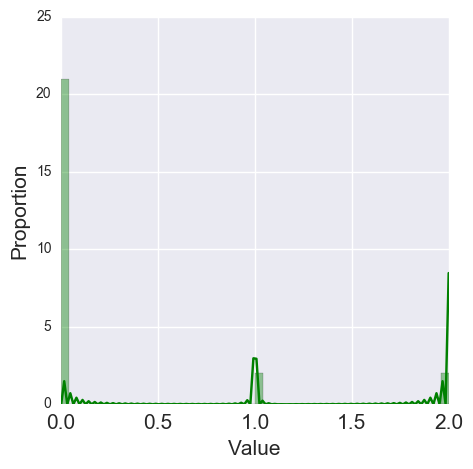

In [9]:
# Distribution of y
plt.figure(figsize=(5, 5))
sns.distplot(df.FRAUD, hist=True, color="g")
plt.legend(fontsize = 15)
plt.xticks(fontsize=15)    
plt.xlabel('Value', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5]),
 <a list of 25 Text yticklabel objects>)

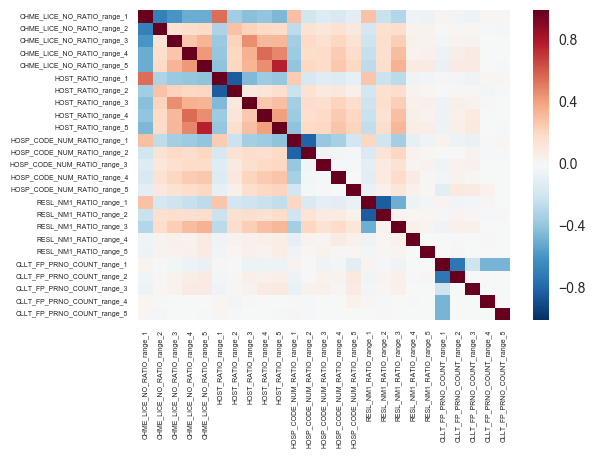

In [10]:
# Correlation check
category_corr = X.corr(method='spearman')
sns.heatmap(category_corr) # print(category_corr)
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 5)

# 4. Splitting for test and validation

- Training set: a set of examples used for learning: to fit the parameters of the classifier In the MLP case, we would use the training set to find the “optimal” weights with the back-prop rule


- Validation set: a set of examples used to tune the parameters of a classifier In the MLP case, we would use the validation set to find the “optimal” number of hidden units or determine a stopping point for the back-propagation algorithm


- Test set: a set of examples used only to assess the performance of a fully-trained classifier In the MLP case, we would use the test to estimate the error rate after we have chosen the final model (MLP size and actual weights) After assessing the final model on the test set, YOU MUST NOT tune the model any further!


- Why separate test and validation sets? The error rate estimate of the final model on validation data will be biased (smaller than the true error rate) since the validation set is used to select the final model After assessing the final model on the test set, YOU MUST NOT tune the model any further!

(source : Introduction to Pattern Analysis,Ricardo Gutierrez-OsunaTexas A&M University, Texas A&M University)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

print("Total count of traing set :")
print(y_train.value_counts(),"\n")
print("Total count of validation set :")
print(y_valid.value_counts(),"\n")

Total count of traing set :
0    13169
1     1255
Name: FRAUD, dtype: int64 

Total count of validation set :
0    5632
1     551
Name: FRAUD, dtype: int64 



# 5. Feature Selection

## 5-1. Feature Importance

### A) SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(chi2)
skb.fit_transform(X_train, y_train)

skb_feature_importance = pd.DataFrame(columns=['features', 'importance', 'p-value'])

for i in range(len(X_train.columns)):
    skb_feature_importance.loc[i] = [X_train.columns[i], skb.scores_[i], skb.pvalues_[i]]

skb_feature_importance.sort_values(by='importance', ascending=False, inplace=True)
print(skb_feature_importance)

                       features   importance        p-value
4    CHME_LICE_NO_RATIO_range_5  4765.144197   0.000000e+00
9            HOST_RATIO_range_5  3329.312467   0.000000e+00
3    CHME_LICE_NO_RATIO_range_4  1179.707675  1.568262e-258
13  HOSP_CODE_NUM_RATIO_range_4   910.972460  4.041623e-200
0    CHME_LICE_NO_RATIO_range_1   857.360668  1.825365e-188
8            HOST_RATIO_range_4   695.642985  2.649537e-153
17       RESL_NM1_RATIO_range_3   647.746551  6.905468e-143
5            HOST_RATIO_range_1   607.029050  4.953810e-134
14  HOSP_CODE_NUM_RATIO_range_5   606.816980  5.508907e-134
11  HOSP_CODE_NUM_RATIO_range_2   538.373597  4.258475e-119
12  HOSP_CODE_NUM_RATIO_range_3   420.311633   2.087448e-93
2    CHME_LICE_NO_RATIO_range_3   358.665508   5.497524e-80
7            HOST_RATIO_range_3   291.234917   2.675969e-65
15       RESL_NM1_RATIO_range_1   269.095634   1.786541e-60
10  HOSP_CODE_NUM_RATIO_range_1   206.275775   8.921134e-47
21   CLLT_FP_PRNO_COUNT_range_2   114.57

In [13]:
# Fit model using each importance as a threshold
thresholds = skb_feature_importance["importance"].tolist()
print("="*5, "thresholds", "="*5)
thresholds

===== thresholds =====


[4765.1441971831109,
 3329.3124674265059,
 1179.7076754484251,
 910.97245983134917,
 857.36066805271878,
 695.642984928484,
 647.74655143188181,
 607.02905019488469,
 606.81698009238767,
 538.37359664380062,
 420.31163316240287,
 358.66550828667334,
 291.23491685986642,
 269.0956339812596,
 206.2757750053116,
 114.57375600491193,
 113.37254591162358,
 110.57667145762008,
 76.167723482141113,
 49.059102807464598,
 29.893070982497811,
 28.013547956422627,
 2.4219459966454226,
 1.4207015165333383,
 1.1641425343089351]

In [14]:
#This code would be fixed

"""
selection_model = RandomForestClassifier()

for thresh in thresholds:
    # select features using threshold
    print(thresh)
    selection = SelectFromModel(selection_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    print(select_X_train)
    # train model

    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_valid = selection.transform(X_valid)
    y_pred = selection_model.predict(select_X_valid)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    f1 = f1_score(y_valid, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, f1_score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))
    print("")
"""

'\nselection_model = RandomForestClassifier()\n\nfor thresh in thresholds:\n    # select features using threshold\n    print(thresh)\n    selection = SelectFromModel(selection_model, threshold=thresh, prefit=True)\n    select_X_train = selection.transform(X_train)\n    print(select_X_train)\n    # train model\n\n    selection_model.fit(select_X_train, y_train)\n    # eval model\n    select_X_valid = selection.transform(X_valid)\n    y_pred = selection_model.predict(select_X_valid)\n    predictions = [round(value) for value in y_pred]\n    accuracy = accuracy_score(y_valid, predictions)\n    f1 = f1_score(y_valid, predictions)\n    \n    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))\n    print("Thresh=%.3f, n=%d, f1_score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))\n    print("")\n'

### B) Random Forest

A faster methods of feature selection includes selecting best features from a model. We can either look at coefficients of a logit model or **we can train a random forest to select best features and then use them later with other machine learning models.**

In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_feature_importance = pd.DataFrame(columns=['features', 'importance'])

for i in range(len(X_train.columns)):
    rf_feature_importance.loc[i] = [X_train.columns[i], rf_model.feature_importances_[i]]

rf_feature_importance.sort_values(by='importance', ascending=False, inplace=True)
print(rf_feature_importance)

                       features  importance
9            HOST_RATIO_range_5    0.258394
4    CHME_LICE_NO_RATIO_range_5    0.237936
0    CHME_LICE_NO_RATIO_range_1    0.137158
3    CHME_LICE_NO_RATIO_range_4    0.128486
5            HOST_RATIO_range_1    0.053527
8            HOST_RATIO_range_4    0.042607
2    CHME_LICE_NO_RATIO_range_3    0.021774
10  HOSP_CODE_NUM_RATIO_range_1    0.019695
15       RESL_NM1_RATIO_range_1    0.018795
17       RESL_NM1_RATIO_range_3    0.018581
1    CHME_LICE_NO_RATIO_range_2    0.015538
16       RESL_NM1_RATIO_range_2    0.014758
6            HOST_RATIO_range_2    0.012505
7            HOST_RATIO_range_3    0.011564
11  HOSP_CODE_NUM_RATIO_range_2    0.002383
21   CLLT_FP_PRNO_COUNT_range_2    0.001573
20   CLLT_FP_PRNO_COUNT_range_1    0.001399
19       RESL_NM1_RATIO_range_5    0.001383
12  HOSP_CODE_NUM_RATIO_range_3    0.000876
18       RESL_NM1_RATIO_range_4    0.000365
14  HOSP_CODE_NUM_RATIO_range_5    0.000299
13  HOSP_CODE_NUM_RATIO_range_4 

In [16]:
# Fit model using each importance as a threshold
thresholds = sorted(rf_model.feature_importances_, reverse=True)
print("="*5, "thresholds", "="*5)
thresholds

===== thresholds =====


[0.2583938053578993,
 0.23793608529779844,
 0.13715828743647887,
 0.12848593730444421,
 0.053527399354717432,
 0.042606824040195689,
 0.021774226553143733,
 0.019695415190366002,
 0.018795249215050162,
 0.018581342219435228,
 0.015538078629411051,
 0.014758093363897735,
 0.012504976475334528,
 0.011564386418402076,
 0.0023826945060273189,
 0.0015734201117937889,
 0.0013985760086394077,
 0.0013825426302994308,
 0.0008763934003974867,
 0.00036498034780265537,
 0.000298935746506127,
 0.00018370952994573698,
 0.00014769607825467905,
 6.0538671465414183e-05,
 1.0406112293467331e-05]

In [17]:
max_f1 = 0

for thresh in thresholds:
    # select features using threshold
    print(thresh)
    selection = SelectFromModel(rf_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_valid = selection.transform(X_valid)
    y_pred = selection_model.predict(select_X_valid)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    f1 = f1_score(y_valid, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, f1_score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))
    print("")
    
    # Get number of best feature
    if(max_f1 < f1):
        max_f1 = f1
        rf_n_good_feature = select_X_train.shape[1]

0.258393805358
Thresh=0.258, n=1, Accuracy: 96.57%
Thresh=0.258, n=1, f1_score: 78.76%

0.237936085298
Thresh=0.238, n=2, Accuracy: 97.69%
Thresh=0.238, n=2, f1_score: 86.75%

0.137158287436
Thresh=0.137, n=3, Accuracy: 98.12%
Thresh=0.137, n=3, f1_score: 89.04%

0.128485937304
Thresh=0.128, n=4, Accuracy: 98.11%
Thresh=0.128, n=4, f1_score: 89.12%

0.0535273993547
Thresh=0.054, n=5, Accuracy: 98.19%
Thresh=0.054, n=5, f1_score: 89.65%

0.0426068240402
Thresh=0.043, n=6, Accuracy: 98.08%
Thresh=0.043, n=6, f1_score: 89.07%

0.0217742265531
Thresh=0.022, n=7, Accuracy: 98.24%
Thresh=0.022, n=7, f1_score: 89.84%

0.0196954151904
Thresh=0.020, n=8, Accuracy: 98.32%
Thresh=0.020, n=8, f1_score: 90.49%

0.0187952492151
Thresh=0.019, n=9, Accuracy: 98.22%
Thresh=0.019, n=9, f1_score: 89.87%

0.0185813422194
Thresh=0.019, n=10, Accuracy: 98.16%
Thresh=0.019, n=10, f1_score: 89.44%

0.0155380786294
Thresh=0.016, n=11, Accuracy: 98.20%
Thresh=0.016, n=11, f1_score: 89.71%

0.0147580933639
Thres

### number of the good feature is changeable! (need repeated test)

In [18]:
# To apply featureselection
print(rf_n_good_feature)
rf_feature_importance.features[:rf_n_good_feature]

8


9              HOST_RATIO_range_5
4      CHME_LICE_NO_RATIO_range_5
0      CHME_LICE_NO_RATIO_range_1
3      CHME_LICE_NO_RATIO_range_4
5              HOST_RATIO_range_1
8              HOST_RATIO_range_4
2      CHME_LICE_NO_RATIO_range_3
10    HOSP_CODE_NUM_RATIO_range_1
Name: features, dtype: object

In [19]:
rf_fs_X_train = X_train[rf_feature_importance.features[:rf_n_good_feature]]
rf_fs_X_valid = X_valid[rf_feature_importance.features[:rf_n_good_feature]]

print(rf_fs_X_train)
print(rf_fs_X_valid)

       HOST_RATIO_range_5  CHME_LICE_NO_RATIO_range_5  \
13988                 0.0                      0.0625   
5354                  0.0                      0.0000   
3953                  0.0                      0.0000   
20252                 0.0                      0.0000   
10159                 0.0                      0.0000   
20052                 0.0                      0.0000   
8474                  0.0                      0.0000   
19881                 0.0                      0.0000   
13225                 0.0                      0.0000   
10015                 0.0                      0.0000   
6521                  0.0                      0.0000   
7275                  0.0                      0.0000   
16427                 0.0                      0.0000   
5713                  0.0                      0.0000   
19211                 0.0                      0.0000   
4293                  0.0                      0.0000   
8203                  0.0      

In [20]:
clf = RandomForestClassifier()
train_scores = cross_val_score(clf, rf_fs_X_train, y_train, cv=30)
print("Accuracy: %0.5f (+/- %0.5f)" % (train_scores.mean(), train_scores.std() * 2))

valid_scores = cross_val_score(clf, rf_fs_X_valid, y_valid, cv=30)
print("Validation-set Accuracy: %0.5f (+/- %0.5f)" % (valid_scores.mean(), valid_scores.std() * 2))

Accuracy: 0.98198 (+/- 0.01101)
Validation-set Accuracy: 0.98172 (+/- 0.01658)


### C) XGBoost

This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.

In the example below we first train and then evaluate an XGBoost model on the entire training dataset and test datasets respectively.

Using the feature importances calculated from the training dataset, we then wrap the model in a SelectFromModel instance. We use this to select features on the training dataset, train a model from the selected subset of features, then evaluate the model on the testset, subject to the same feature selection scheme.

For example:

ref : http://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

                       features  importance
0    CHME_LICE_NO_RATIO_range_1    0.207373
9            HOST_RATIO_range_5    0.138249
4    CHME_LICE_NO_RATIO_range_5    0.112135
5            HOST_RATIO_range_1    0.087558
3    CHME_LICE_NO_RATIO_range_4    0.081413
1    CHME_LICE_NO_RATIO_range_2    0.062980
8            HOST_RATIO_range_4    0.049155
16       RESL_NM1_RATIO_range_2    0.044547
2    CHME_LICE_NO_RATIO_range_3    0.038402
6            HOST_RATIO_range_2    0.038402
17       RESL_NM1_RATIO_range_3    0.032258
15       RESL_NM1_RATIO_range_1    0.027650
10  HOSP_CODE_NUM_RATIO_range_1    0.027650
21   CLLT_FP_PRNO_COUNT_range_2    0.018433
7            HOST_RATIO_range_3    0.012289
24   CLLT_FP_PRNO_COUNT_range_5    0.010753
20   CLLT_FP_PRNO_COUNT_range_1    0.004608
12  HOSP_CODE_NUM_RATIO_range_3    0.004608
11  HOSP_CODE_NUM_RATIO_range_2    0.001536
14  HOSP_CODE_NUM_RATIO_range_5    0.000000
13  HOSP_CODE_NUM_RATIO_range_4    0.000000
18       RESL_NM1_RATIO_range_4 

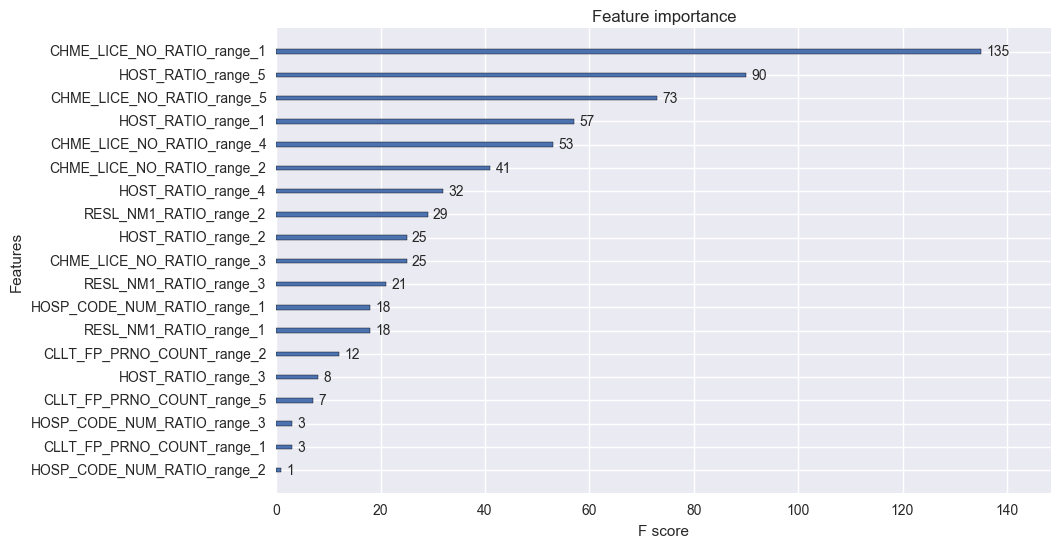

In [21]:
# feature importance rank
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_feature_importance = pd.DataFrame(columns=['features', 'importance'])

for i in range(len(X_train.columns)):
    xgb_feature_importance.loc[i] = [X_train.columns[i], xgb_model.feature_importances_[i]]

xgb_feature_importance.sort_values(by='importance', ascending=False, inplace=True)
print(xgb_feature_importance)

# feature importance graph
fig, ax = plt.subplots(figsize=(10, 6))
xgb_plot_importance(xgb_model.fit(X_train, y_train), ax=ax)

In [22]:
# Fit model using each importance as a threshold
thresholds = sorted(xgb_model.feature_importances_, reverse=True)
max_f1 = 0

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_valid = selection.transform(X_valid)
    y_pred = selection_model.predict(select_X_valid)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    f1 = f1_score(y_valid, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, f1_score: %.2f%%\n" % (thresh, select_X_train.shape[1], f1*100.0))
    
    # Get Best Feature
    if(max_f1 < f1):
        max_f1 = f1
        xgb_n_good_feature = select_X_train.shape[1]

Thresh=0.207, n=1, Accuracy: 92.95%
Thresh=0.207, n=1, f1_score: 38.76%

Thresh=0.138, n=2, Accuracy: 96.89%
Thresh=0.138, n=2, f1_score: 80.41%

Thresh=0.112, n=3, Accuracy: 98.29%
Thresh=0.112, n=3, f1_score: 90.07%

Thresh=0.088, n=4, Accuracy: 98.25%
Thresh=0.088, n=4, f1_score: 89.89%

Thresh=0.081, n=5, Accuracy: 98.25%
Thresh=0.081, n=5, f1_score: 90.00%

Thresh=0.063, n=6, Accuracy: 98.35%
Thresh=0.063, n=6, f1_score: 90.62%

Thresh=0.049, n=7, Accuracy: 98.43%
Thresh=0.049, n=7, f1_score: 91.09%

Thresh=0.045, n=8, Accuracy: 98.43%
Thresh=0.045, n=8, f1_score: 91.13%

Thresh=0.038, n=10, Accuracy: 98.43%
Thresh=0.038, n=10, f1_score: 91.09%

Thresh=0.038, n=10, Accuracy: 98.43%
Thresh=0.038, n=10, f1_score: 91.09%

Thresh=0.032, n=11, Accuracy: 98.40%
Thresh=0.032, n=11, f1_score: 90.91%

Thresh=0.028, n=13, Accuracy: 98.50%
Thresh=0.028, n=13, f1_score: 91.48%

Thresh=0.028, n=13, Accuracy: 98.50%
Thresh=0.028, n=13, f1_score: 91.48%

Thresh=0.018, n=14, Accuracy: 98.46%
Thre

### number of the good feature is changeable! (need repeated test)

In [23]:
xgb_n_good_feature

13

In [24]:
# To apply featureselection
xgb_feature_importance.features[:xgb_n_good_feature]

0      CHME_LICE_NO_RATIO_range_1
9              HOST_RATIO_range_5
4      CHME_LICE_NO_RATIO_range_5
5              HOST_RATIO_range_1
3      CHME_LICE_NO_RATIO_range_4
1      CHME_LICE_NO_RATIO_range_2
8              HOST_RATIO_range_4
16         RESL_NM1_RATIO_range_2
2      CHME_LICE_NO_RATIO_range_3
6              HOST_RATIO_range_2
17         RESL_NM1_RATIO_range_3
15         RESL_NM1_RATIO_range_1
10    HOSP_CODE_NUM_RATIO_range_1
Name: features, dtype: object

In [25]:
xgb_fs_X_train = X_train[xgb_feature_importance.features[:xgb_n_good_feature]]
xgb_fs_X_valid = X_valid[xgb_feature_importance.features[:xgb_n_good_feature]]

print(xgb_fs_X_train)
print(xgb_fs_X_valid)

       CHME_LICE_NO_RATIO_range_1  HOST_RATIO_range_5  \
13988                    0.562500                 0.0   
5354                     0.000000                 0.0   
3953                     0.000000                 0.0   
20252                    1.000000                 0.0   
10159                    0.000000                 0.0   
20052                    1.000000                 0.0   
8474                     0.500000                 0.0   
19881                    0.000000                 0.0   
13225                    1.000000                 0.0   
10015                    1.000000                 0.0   
6521                     1.000000                 0.0   
7275                     0.666667                 0.0   
16427                    1.000000                 0.0   
5713                     1.000000                 0.0   
19211                    1.000000                 0.0   
4293                     0.000000                 0.0   
8203                     0.5000

In [26]:
clf = XGBClassifier()
train_scores = cross_val_score(clf, xgb_fs_X_train, y_train, cv=30)
print("Accuracy: %0.5f (+/- %0.5f)" % (train_scores.mean(), train_scores.std() * 2))

test_scores = cross_val_score(clf, xgb_fs_X_valid, y_valid, cv=30)
print("Validation-set Accuracy: %0.5f (+/- %0.5f)" % (test_scores.mean(), test_scores.std() * 2))

Accuracy: 0.98392 (+/- 0.01078)
Validation-set Accuracy: 0.98317 (+/- 0.01870)


### Result

XGBoost > Random-Foreset > ~~SelectKBest~~

# 6. Model Selection (Classification)
- Logistic
- Random Forest
- SVC
- Gaussian Naive Bayes
- XGBoost

## 6-1. Logistic Regression

In [27]:
lr_model = LogisticRegression()
lr_model.fit(xgb_fs_X_train, y_train)
lr_y_pred = lr_model.predict(xgb_fs_X_valid)
lr_y_pred_prob = lr_model.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, lr_y_pred)
f1 = f1_score(y_valid, lr_y_pred)
print("Logistic - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

Logistic - accuracy : 0.98092 f1 : 0.88740


## 6-2. Random Forest

In [28]:
rf_model = RandomForestClassifier()
rf_model.fit(xgb_fs_X_train, y_train)
rf_y_pred = rf_model.predict(xgb_fs_X_valid)
rf_y_pred_prob = rf_model.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, rf_y_pred)
f1 = f1_score(y_valid, rf_y_pred)
print("Random Forest - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

Random Forest - accuracy : 0.98205 f1 : 0.89788


## 6-3. SVC

In [29]:
svc_lin = SVC(kernel = 'linear', probability=True)
svc_lin.fit(xgb_fs_X_train, y_train)
svc_lin_pred = svc_lin.predict(xgb_fs_X_valid)
svc_lin_pred_prob = svc_lin.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, svc_lin_pred)
f1 = f1_score(y_valid, svc_lin_pred)
print("SVC linear - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

svc_rbf = SVC(kernel = 'rbf', probability=True)
svc_rbf.fit(xgb_fs_X_train, y_train)
svc_rbf_pred = svc_rbf.predict(xgb_fs_X_valid)
svc_rbf_pred_prob = svc_rbf.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, svc_rbf_pred)
f1 = f1_score(y_valid, svc_rbf_pred)
print("SVC rbf - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

SVC linear - accuracy : 0.98027 f1 : 0.88403
SVC rbf - accuracy : 0.98253 f1 : 0.89850


## 6-4. Gaussian Naive Bayes

In [30]:
gnb_model = GaussianNB()
gnb_model.fit(xgb_fs_X_train, y_train)
gnb_y_pred = gnb_model.predict(xgb_fs_X_valid)
gnb_y_pred_prob = gnb_model.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, gnb_y_pred)
f1 = f1_score(y_valid, gnb_y_pred)
print("Gaussian Naive Bayes - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

Gaussian Naive Bayes - accuracy : 0.95957 f1 : 0.80945


## 6-5. XGBoost

In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(xgb_fs_X_train, y_train)
xgb_y_pred = xgb_model.predict(xgb_fs_X_valid)
xgb_y_pred_prob = xgb_model.predict_proba(xgb_fs_X_valid)

accuracy = accuracy_score(y_valid, xgb_y_pred)
f1 = f1_score(y_valid, xgb_y_pred)
print("XGBoost - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

XGBoost - accuracy : 0.98496 f1 : 0.91476


# ROC curve

In [32]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_valid, lr_y_pred_prob[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, rf_y_pred_prob[:, 1])
fpr_svc_lin, tpr_svc_lin, thresholds_svc_lin = roc_curve(y_valid, svc_lin_pred_prob[:, 1])
fpr_svc_rbf, tpr_svc_rbf, thresholds_svc_rbf = roc_curve(y_valid, svc_rbf_pred_prob[:, 1])
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_valid, gnb_y_pred_prob[:, 1])
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_valid, xgb_y_pred_prob[:, 1])

from sklearn.metrics import auc
print("ROC of Logistic Regression: ", auc(fpr_lr, tpr_lr))
print("ROC of Random Forest: ", auc(fpr_rf, tpr_rf))
print("ROC of SVC(linear kernal): ", auc(fpr_svc_lin, tpr_svc_lin))
print("ROC of SVC(rbf kernal)", auc(fpr_svc_rbf, tpr_svc_rbf))
print("ROC of Gaussian Naive Bayes: ", auc(fpr_gnb, thresholds_gnb))
print("ROC of XGBoost: ", auc(fpr_xgb, tpr_xgb))

ROC of Logistic Regression:  0.992202323255
ROC of Random Forest:  0.985237165639
ROC of SVC(linear kernal):  0.992126918
ROC of SVC(rbf kernal) 0.99372122355
ROC of Gaussian Naive Bayes:  0.0502457784466
ROC of XGBoost:  0.99486100298


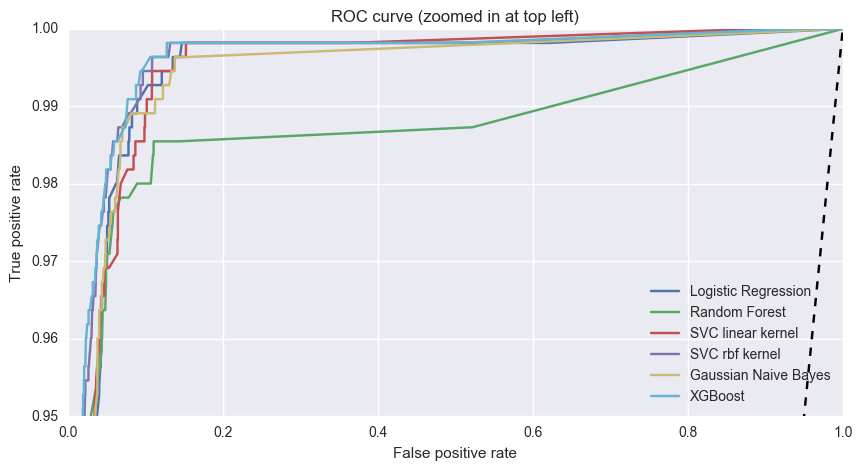

In [33]:
plt.figure(figsize=(10,5))
plt.xlim(0, 1.0)
plt.ylim(0.95, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc_lin, tpr_svc_lin, label='SVC linear kernel')
plt.plot(fpr_svc_rbf, tpr_svc_rbf, label='SVC rbf kernel')
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Check result of prediction 

In [34]:
answer_sheet = pd.read_csv('./data/answer_sheet.csv', encoding='cp949', low_memory=False)
answer_sheet

,CUST_ID,FRAUD
0,37,0
1,51,0
2,60,0
3,65,0
4,73,0
5,101,0
6,106,0
7,116,0
8,123,0
9,125,1


In [35]:
fs_X = X[xgb_feature_importance.features[:xgb_n_good_feature]]
fs_X.describe()

,CHME_LICE_NO_RATIO_range_1,HOST_RATIO_range_5,CHME_LICE_NO_RATIO_range_5,HOST_RATIO_range_1,CHME_LICE_NO_RATIO_range_4,CHME_LICE_NO_RATIO_range_2,HOST_RATIO_range_4,RESL_NM1_RATIO_range_2,CHME_LICE_NO_RATIO_range_3,HOST_RATIO_range_2,RESL_NM1_RATIO_range_3,RESL_NM1_RATIO_range_1,HOSP_CODE_NUM_RATIO_range_1
count,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000,20607.000000
mean,0.794923,0.027857,0.037711,0.742461,0.034903,0.079703,0.022828,0.247451,0.052759,0.165973,0.093830,0.657248,0.897705
std,0.353158,0.122490,0.148479,0.373049,0.136752,0.214280,0.107836,0.349792,0.169002,0.297153,0.229096,0.397398,0.303044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
test_set = df[df.FRAUD == 2]
test_set = answer_sheet.merge(test_set, on="CUST_ID")
test_set

,CUST_ID,FRAUD_x,DIVIDED_SET,FRAUD_y,CHME_LICE_NO_RATIO_range_1,CHME_LICE_NO_RATIO_range_2,CHME_LICE_NO_RATIO_range_3,CHME_LICE_NO_RATIO_range_4,CHME_LICE_NO_RATIO_range_5,HOST_RATIO_range_1,...,RESL_NM1_RATIO_range_1,RESL_NM1_RATIO_range_2,RESL_NM1_RATIO_range_3,RESL_NM1_RATIO_range_4,RESL_NM1_RATIO_range_5,CLLT_FP_PRNO_COUNT_range_1,CLLT_FP_PRNO_COUNT_range_2,CLLT_FP_PRNO_COUNT_range_3,CLLT_FP_PRNO_COUNT_range_4,CLLT_FP_PRNO_COUNT_range_5
0,37,0,2,2,1.000000,0.000000,0.000000,0.00,0.0,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
1,51,0,2,2,0.400000,0.400000,0.000000,0.20,0.0,0.200000,...,0.800000,0.200000,0.000000,0.0,0.0,1,0,0,0,0
2,60,0,2,2,1.000000,0.000000,0.000000,0.00,0.0,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
3,65,0,2,2,1.000000,0.000000,0.000000,0.00,0.0,1.000000,...,0.000000,1.000000,0.000000,0.0,0.0,1,0,0,0,0
4,73,0,2,2,1.000000,0.000000,0.000000,0.00,0.0,0.000000,...,0.000000,1.000000,0.000000,0.0,0.0,1,0,0,0,0
5,101,0,2,2,1.000000,0.000000,0.000000,0.00,0.0,1.000000,...,0.500000,0.500000,0.000000,0.0,0.0,1,0,0,0,0
6,106,0,2,2,0.000000,1.000000,0.000000,0.00,0.0,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
7,116,0,2,2,0.000000,1.000000,0.000000,0.00,0.0,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0
8,123,0,2,2,0.666667,0.333333,0.000000,0.00,0.0,0.666667,...,0.666667,0.333333,0.000000,0.0,0.0,1,0,0,0,0
9,125,1,2,2,0.000000,0.000000,0.000000,0.00,1.0,0.000000,...,0.000000,0.500000,0.500000,0.0,0.0,1,0,0,0,0


In [37]:
test_X = test_set.drop(['CUST_ID', 'DIVIDED_SET', 'FRAUD_x', 'FRAUD_y'], axis=1)
test_X = test_X[xgb_feature_importance.features[:xgb_n_good_feature]]
test_X.describe()

,CHME_LICE_NO_RATIO_range_1,HOST_RATIO_range_5,CHME_LICE_NO_RATIO_range_5,HOST_RATIO_range_1,CHME_LICE_NO_RATIO_range_4,CHME_LICE_NO_RATIO_range_2,HOST_RATIO_range_4,RESL_NM1_RATIO_range_2,CHME_LICE_NO_RATIO_range_3,HOST_RATIO_range_2,RESL_NM1_RATIO_range_3,RESL_NM1_RATIO_range_1,HOSP_CODE_NUM_RATIO_range_1
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,0.551944,0.015090,0.014882,0.640583,0.033826,0.348314,0.025969,0.254063,0.051034,0.280664,0.101464,0.639181,0.905187
std,0.413435,0.088512,0.092296,0.392617,0.143407,0.388827,0.120203,0.353101,0.172391,0.356304,0.243138,0.403738,0.293038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000
50%,0.500000,0.000000,0.000000,0.750000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.666667,0.000000,0.500000,0.000000,0.500000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
clf = XGBClassifier(min_child_weight=7, learning_rate=1.0, subsample=1.0, gamma=0.9)
fial_model = clf.fit(fs_X, y)
xgb_y_pred = fial_model.predict(test_X)
print(pd.Series(xgb_y_pred).value_counts())

0    1697
1      96
dtype: int64


In [39]:
accuracy = accuracy_score(answer_sheet.FRAUD, xgb_y_pred)
f1 = f1_score(answer_sheet.FRAUD, xgb_y_pred)
print("XGBoost - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

XGBoost - accuracy : 0.94200 f1 : 0.59055


# Parameter optimization

ref : http://scikit-learn.org/stable/modules/grid_search.html

In [40]:
%%time
# Xgboost parameters
xbg_param_grid = {
    "learning_rate" : [0.01, 0.015, 0.025, 0.05, 1.0],
    "gamma" : [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    #"max_depth" : [3, 5, 7, 9, 12, 15, 17, 25],
    "min_child_weight" : [1, 3, 5, 7],
    "subsample" : [0.6, 0.7, 0.8, 0.9, 1.0],
    #"colsample_bytree" : [0.6, 0.7, 0.8, 0.9, 1.0],
                 }

# run grid search
xbg_grid = GridSearchCV(xgb_model, param_grid=xbg_param_grid)
#xbg_grid = RandomizedSearchCV(xgb_model, param_grid=xbg_param_grid) 

xbg_grid.fit(fs_X, y)

CPU times: user 22min 24s, sys: 2min 7s, total: 24min 32s
Wall time: 13min 47s


In [41]:
xbg_grid.grid_scores_

[mean: 0.98141, std: 0.00025, params: {'min_child_weight': 1, 'gamma': 0.05, 'subsample': 0.6, 'learning_rate': 0.01},
 mean: 0.98180, std: 0.00043, params: {'min_child_weight': 1, 'gamma': 0.05, 'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.98132, std: 0.00018, params: {'min_child_weight': 1, 'gamma': 0.05, 'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.98146, std: 0.00054, params: {'min_child_weight': 1, 'gamma': 0.05, 'subsample': 0.9, 'learning_rate': 0.01},
 mean: 0.98112, std: 0.00025, params: {'min_child_weight': 1, 'gamma': 0.05, 'subsample': 1.0, 'learning_rate': 0.01},
 mean: 0.98132, std: 0.00045, params: {'min_child_weight': 3, 'gamma': 0.05, 'subsample': 0.6, 'learning_rate': 0.01},
 mean: 0.98137, std: 0.00012, params: {'min_child_weight': 3, 'gamma': 0.05, 'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.98122, std: 0.00024, params: {'min_child_weight': 3, 'gamma': 0.05, 'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.98132, std: 0.00054, params: {'min_chil

In [42]:
print(xbg_grid.best_score_)
print(xbg_grid.best_params_)

0.983209588975
{'min_child_weight': 1, 'gamma': 0.05, 'subsample': 0.6, 'learning_rate': 0.05}


In [43]:
xbg_grid.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.05, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6)

In [44]:
fial_model = xbg_grid.best_estimator_.fit(fs_X, y)
param_opt_xgb_y_pred = fial_model.predict(test_X)
print(pd.Series(xgb_y_pred).value_counts())

0    1697
1      96
dtype: int64


In [45]:
accuracy = accuracy_score(answer_sheet.FRAUD, param_opt_xgb_y_pred)
f1 = f1_score(answer_sheet.FRAUD, param_opt_xgb_y_pred)
print("XGBoost - accuracy : %0.5f f1 : %0.5f" %(accuracy, f1))

XGBoost - accuracy : 0.94311 f1 : 0.58197


"After parameter optimization, I found that score was decreased. There is reason I found, bellow"

ref : http://scikit-learn.org/stable/modules/grid_search.html#grid-search

3.2.3.5. Robustness to failure¶

Some parameter settings may result in a failure to fit one or more folds of the data. By default, this will cause the entire search to fail, even if some parameter settings could be fully evaluated. Setting error_score=0 (or =np.NaN) will make the procedure robust to such failure, issuing a warning and setting the score for that fold to 0 (or NaN), but completing the search.